**Data Analysis Internship Task**

**Level 3**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload your dataset
from google.colab import files
uploaded = files.upload()

# Load the CSV
df = pd.read_csv('Dataset .csv')
df.head()

Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task 1: Votes Analysis

Highest Votes:
     Restaurant Name  Votes  Aggregate rating
728            Toit  10934               4.8

Lowest Votes:
                  Restaurant Name  Votes  Aggregate rating
69              Cantinho da Gula      0               0.0
874                The Chaiwalas      0               0.0
879           Fusion Food Corner      0               0.0
880                Punjabi Rasoi      0               0.0
887                Baskin Robbin      0               0.0
...                          ...    ...               ...
9044               6 Packs Momos      0               0.0
9098                   Cafe' Wow      0               0.0
9099  Chef's Basket Pop Up Caf��      0               0.0
9103            The Hangout-Deli      0               0.0
9111                    Platters      0               0.0

[1094 rows x 3 columns]

Correlation between Votes and Rating:
                      Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691 

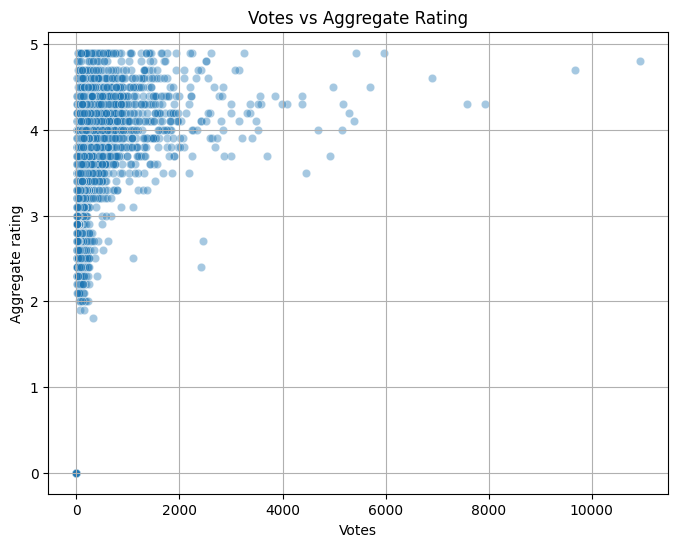

In [3]:
# Highest and lowest votes
top_voted = df[df['Votes'] == df['Votes'].max()][['Restaurant Name', 'Votes', 'Aggregate rating']]
low_voted = df[df['Votes'] == df['Votes'].min()][['Restaurant Name', 'Votes', 'Aggregate rating']]

print("Highest Votes:\n", top_voted)
print("\nLowest Votes:\n", low_voted)

# Correlation analysis
correlation = df[['Votes', 'Aggregate rating']].corr()
print("\nCorrelation between Votes and Rating:\n", correlation)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.4)
plt.title("Votes vs Aggregate Rating")
plt.grid(True)
plt.show()


 Task 2: Price Range vs Online Delivery & Table Booking

Online Delivery by Price Range:
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Table Booking by Price Range:
 Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


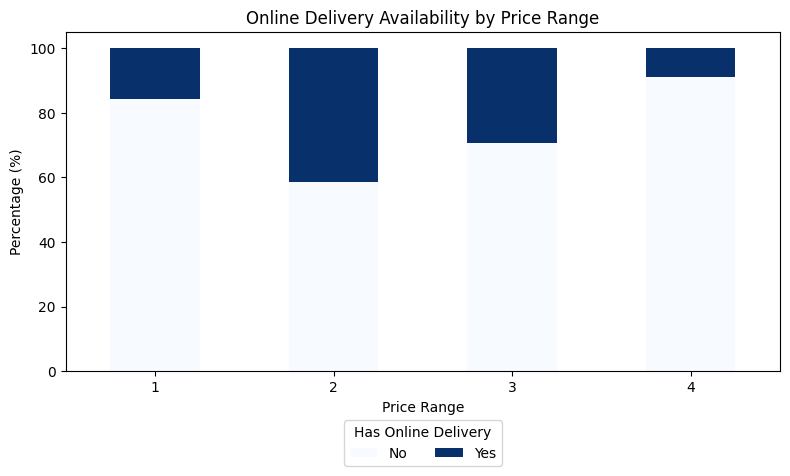

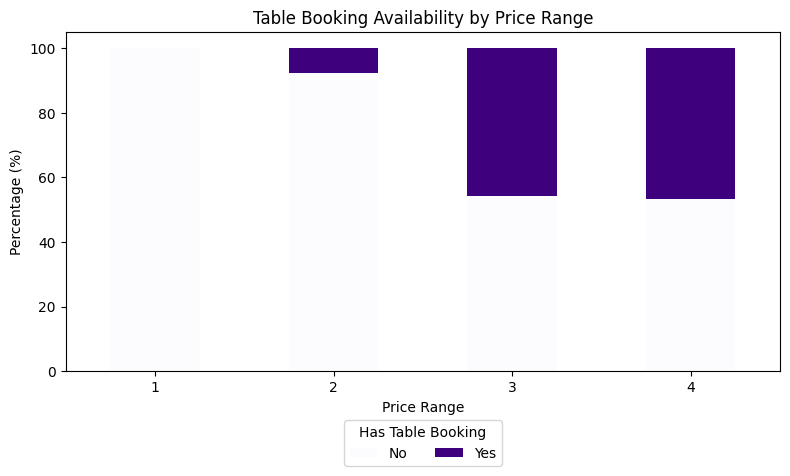

In [7]:
# Group by price range for Online Delivery and Table Booking
price_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
price_booking = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0) * 100

print("Online Delivery by Price Range:\n", price_delivery)
print("\nTable Booking by Price Range:\n", price_booking)

# Plot: Online Delivery
ax1 = price_delivery.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Blues')
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Percentage (%)")
plt.xlabel("Price Range")
plt.xticks(rotation=0)
plt.legend(title="Has Online Delivery", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.tight_layout()
plt.show()

# Plot: Table Booking
ax2 = price_booking.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Purples')
plt.title("Table Booking Availability by Price Range")
plt.ylabel("Percentage (%)")
plt.xlabel("Price Range")
plt.xticks(rotation=0)
plt.legend(title="Has Table Booking", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.tight_layout()
plt.show()
